<a href="https://colab.research.google.com/github/WilliamScoralick/ChallengeAluraStore/blob/main/C%C3%B3pia_de_AluraStoreBr_(10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adicionando identificação da loja em cada DataFrame
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os DataFrames em um só
lojas_combinadas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Convertendo a coluna 'Data da Compra' para datetime
lojas_combinadas['Data da Compra'] = pd.to_datetime(lojas_combinadas['Data da Compra'], format='%d/%m/%Y')

# Extraindo apenas o ano da data da compra
lojas_combinadas['Ano'] = lojas_combinadas['Data da Compra'].dt.year

# Calculando o faturamento por loja e por ano
faturamento_por_loja_ano = lojas_combinadas.groupby(['Loja', 'Ano'])['Preço'].sum().reset_index()

# Criando uma tabela pivot conforme solicitado: Ano nas linhas, Lojas nas colunas
tabela_faturamento = faturamento_por_loja_ano.pivot(index='Ano', columns='Loja', values='Preço')

# Resetando o índice para ter o ano como coluna
tabela_faturamento = tabela_faturamento.reset_index()

# Renomeando a coluna 'Ano' para uma string vazia
tabela_faturamento = tabela_faturamento.rename(columns={'Ano': ''})

# Calculando o total por ano (soma das 4 lojas)
tabela_faturamento['Total'] = tabela_faturamento[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']].sum(axis=1)

# Formatando valores para exibição em R$
for coluna in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4', 'Total']:
    tabela_faturamento[coluna] = tabela_faturamento[coluna].apply(lambda x: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

# Exibindo a tabela formatada com o título solicitado
print("\nFaturamento Bruto Anual")
print(tabela_faturamento.to_string(index=False))


Faturamento Bruto Anual
         Loja 1     Loja 2     Loja 3     Loja 4        Total
2020 491.911,51 427.288,25 428.943,09 441.129,52 1.789.272,37
2021 482.829,91 468.288,89 483.938,91 463.763,27 1.898.820,98
2022 422.086,24 477.635,56 467.250,70 402.961,23 1.769.933,73
2023 137.681,46 115.246,36  83.892,33  76.643,56   413.463,71


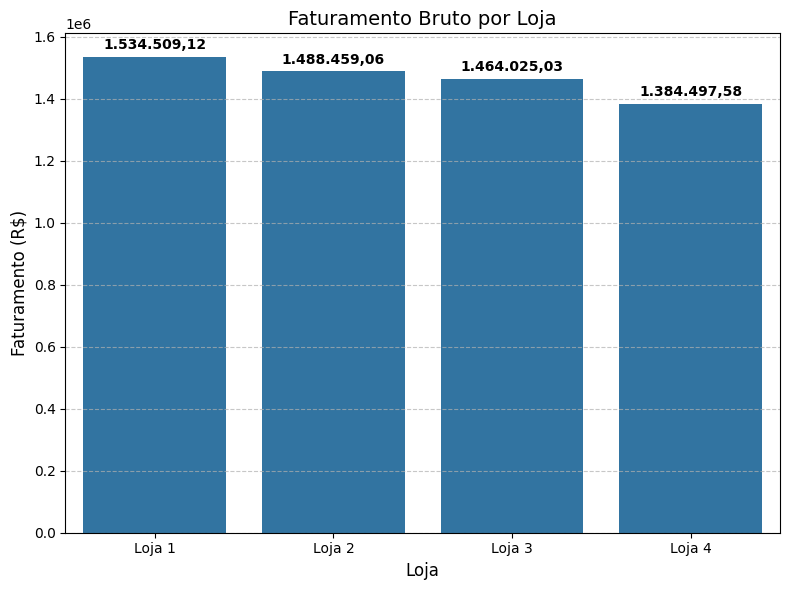

In [4]:
# Adicionando identificação da loja em cada DataFrame
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os DataFrames em um só
lojas_combinadas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calculando o faturamento total por loja
faturamento_por_loja = lojas_combinadas.groupby('Loja')['Preço'].sum().reset_index()

# Criando o gráfico de barras do faturamento por loja
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Loja', y='Preço', data=faturamento_por_loja)
plt.title('Faturamento Bruto por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando os valores sobre as barras
for i, valor in enumerate(faturamento_por_loja['Preço']):
    # Formatando para padrão monetário brasileiro
    valor_formatado = f'{valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    plt.text(i, valor + (valor * 0.01), valor_formatado,
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

# Exibir o gráfico sem mensagens indesejadas
plt.show()

In [5]:
# Adicionando identificação da loja em cada DataFrame
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os DataFrames em um só
lojas_combinadas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calculando o faturamento por loja e por estado
faturamento_por_loja_estado = lojas_combinadas.groupby(['Local da compra', 'Loja'])['Preço'].sum().reset_index()

# Criando uma tabela pivot conforme solicitado: Estado nas linhas, Lojas nas colunas
tabela_faturamento = faturamento_por_loja_estado.pivot(index='Local da compra', columns='Loja', values='Preço')

# Preenchendo valores NaN com 0 (casos em que uma loja não tem vendas em um estado)
tabela_faturamento = tabela_faturamento.fillna(0)

# Verificando se todas as colunas de lojas existem, se não, criando-as com zeros
for loja_nome in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    if loja_nome not in tabela_faturamento.columns:
        tabela_faturamento[loja_nome] = 0

# Calculando o total por estado (soma das 4 lojas)
tabela_faturamento['Total'] = tabela_faturamento[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']].sum(axis=1)

# Filtrando apenas os estados com faturamento total maior que 100.000,00
tabela_faturamento = tabela_faturamento[tabela_faturamento['Total'] > 150000]

# Ordenando os estados por faturamento total
tabela_faturamento = tabela_faturamento.sort_values(by='Total', ascending=False)

# Resetando o índice para ter o estado como coluna
tabela_faturamento = tabela_faturamento.reset_index()

# Renomeando a coluna 'Estado' para uma string vazia para não mostrar o título na tabela
tabela_faturamento = tabela_faturamento.rename(columns={'Local da compra': ''})

# Formatando valores para exibição em R$
for coluna in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4', 'Total']:
    tabela_faturamento[coluna] = tabela_faturamento[coluna].apply(lambda x: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

# Exibindo a tabela formatada com o título solicitado
print("\nFaturamento Bruto por Estado da Federação (> R$ 100.000,00)")
print(tabela_faturamento.to_string(index=False))


Faturamento Bruto por Estado da Federação (> R$ 100.000,00)
       Loja 1     Loja 2     Loja 3     Loja 4        Total
SP 586.673,21 639.945,67 634.081,24 559.106,82 2.419.806,94
RJ 230.010,44 205.460,97 165.838,02 170.103,47   771.412,90
MG 165.802,37 190.868,54 168.270,00 165.874,01   690.814,92
RS 111.347,05  93.717,23  70.918,92  91.628,58   367.611,78
PR  94.643,66  63.959,90  74.798,72  74.354,88   307.757,16
SC  56.332,09  40.981,16  36.231,08  60.857,36   194.401,69
BA  43.877,34  36.988,86  49.024,00  46.163,60   176.053,80


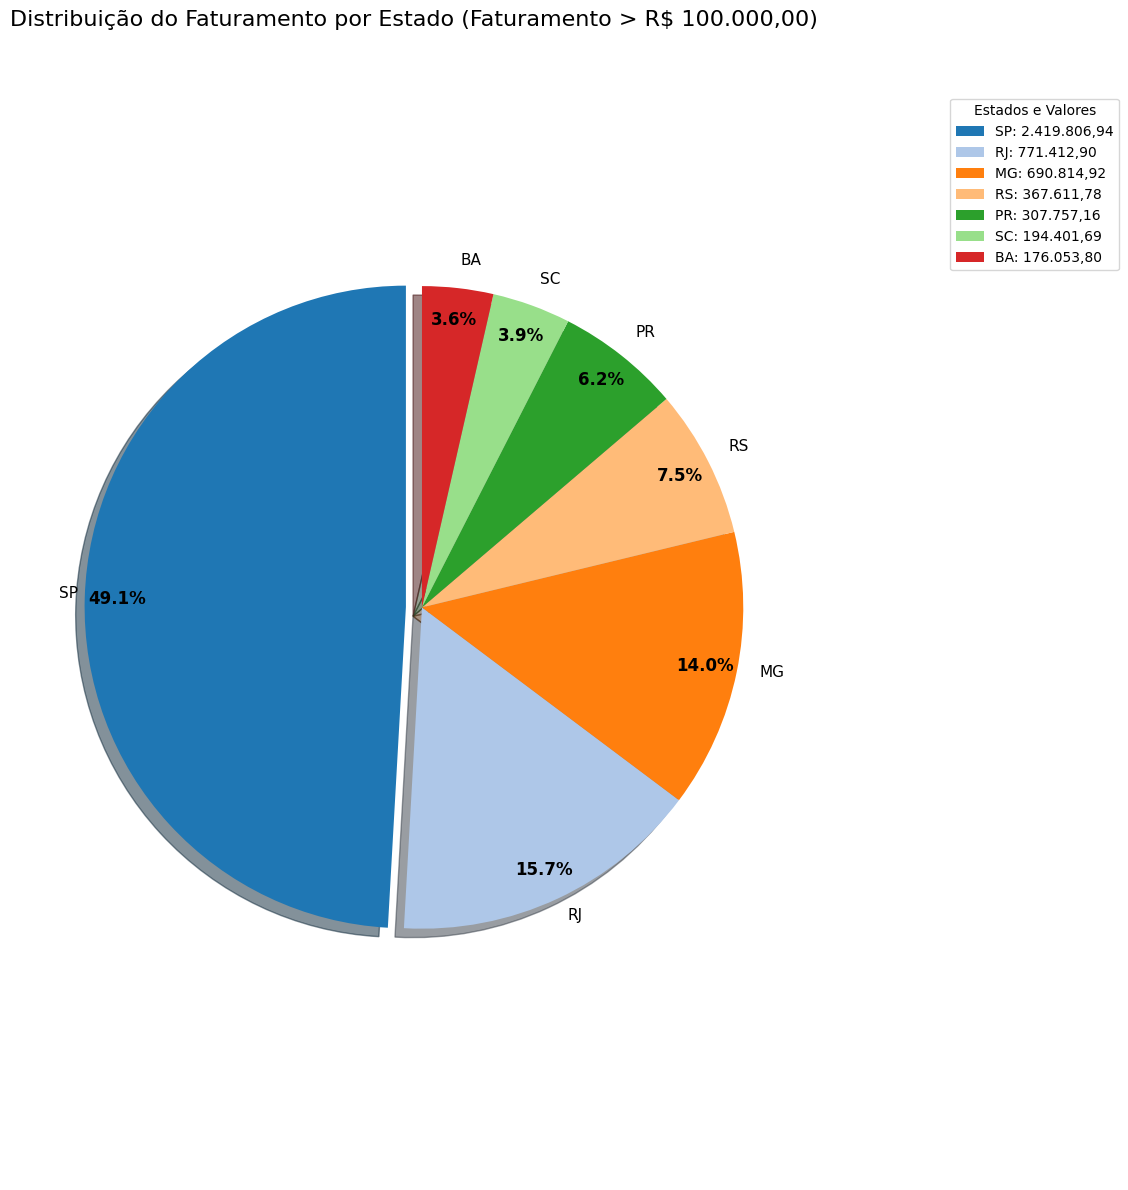

In [6]:
# Convertendo os valores formatados de volta para números para o gráfico
tabela_pizza = tabela_faturamento.copy()
tabela_pizza['Estado'] = tabela_pizza['']  # Salvando o nome do estado em uma nova coluna
tabela_pizza['Valor'] = tabela_pizza['Total'].str.replace('R$ ', '').str.replace('.', '').str.replace(',', '.').astype(float)

# Criando o gráfico de pizza com valores percentuais mais para a extremidade
plt.figure(figsize=(12, 12))

# Definindo o raio para posicionar os valores percentuais mais para a extremidade
raio_percentuais = 0.9  # Valor maior que 1 empurra para fora

wedges, texts, autotexts = plt.pie(
    tabela_pizza['Valor'],
    labels=None,  # Removemos os labels do pie para posicioná-los manualmente
    autopct='%1.1f%%',
    pctdistance=raio_percentuais,  # Posiciona os percentuais para fora
    startangle=90,
    shadow=True,
    explode=[0.05 if i == 0 else 0 for i in range(len(tabela_pizza))],  # Destaca o maior estado
    colors=plt.cm.tab20.colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}  # Melhora a visualização dos percentuais
)

# Personalizando a aparência dos textos de percentual
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# Adicionando os rótulos de estados em posição personalizada
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = np.cos(np.radians(ang)) * 0.825  # Posição radial dos labels (mais próxima do centro)
    y = np.sin(np.radians(ang)) * 0.825

    # Ajustando o alinhamento horizontal com base na posição
    ha = 'center'
    if x < 0:
        ha = 'right'
    elif x > 0:
        ha = 'left'

    plt.annotate(tabela_pizza['Estado'].iloc[i],
                 xy=(x, y),
                 xytext=(1.3*x, 1.3*y),
                 ha=ha,
                 fontsize=11)

plt.title('Distribuição do Faturamento por Estado (Faturamento > R$ 100.000,00)', fontsize=16)
plt.axis('equal')  # Mantém o círculo como um círculo (e não uma elipse)

# Adicionando uma legenda mais detalhada que inclui os valores absolutos
legenda_valores = [f"{estado}: {valor}" for estado, valor in
                  zip(tabela_pizza['Estado'],
                      tabela_pizza['Total'])]

plt.legend(wedges,
           legenda_valores,
           title="Estados e Valores",
           loc="upper right",
           bbox_to_anchor=(1, 0, 0.5, 0.95))

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [7]:
# Adicionando identificação da loja em cada DataFrame
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os DataFrames em um só
lojas_combinadas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calculando o faturamento por loja e por ano
faturamento_por_loja_ano = lojas_combinadas.groupby(['Loja', 'Categoria do Produto'])['Preço'].sum().reset_index()

# Criando uma tabela pivot conforme solicitado: Ano nas linhas, Lojas nas colunas
tabela_faturamento = faturamento_por_loja_ano.pivot(index='Categoria do Produto', columns='Loja', values='Preço')

# Resetando o índice para ter o ano como coluna
tabela_faturamento = tabela_faturamento.reset_index()

# Renomeando a coluna 'Categoria do Produto' para uma string vazia
tabela_faturamento = tabela_faturamento.rename(columns={'Categoria do Produto': ''})

# Calculando o total por ano (soma das 4 lojas)
tabela_faturamento['Total'] = tabela_faturamento[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']].sum(axis=1)

# Formatando valores para exibição em R$
for coluna in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4', 'Total']:
    tabela_faturamento[coluna] = tabela_faturamento[coluna].apply(lambda x: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

# Exibindo a tabela formatada com o título solicitado
print("\nFaturamento por Categoria de Produto")
print(tabela_faturamento.to_string(index=False))


Faturamento por Categoria de Produto
                          Loja 1     Loja 2     Loja 3     Loja 4        Total
           brinquedos  23.993,78  21.262,21  25.869,20  27.015,67    98.140,86
     eletrodomesticos 484.913,36 464.758,13 438.984,89 377.680,65 1.766.337,03
          eletronicos 572.659,23 547.773,71 547.699,92 545.966,86 2.214.099,72
      esporte e lazer  52.387,55  46.326,09  47.456,10  44.465,65   190.635,39
instrumentos musicais 121.731,69 139.987,03 103.174,45 100.136,50   465.029,67
               livros  11.713,92  13.454,35  12.664,70  12.427,77    50.260,74
               moveis 250.178,11 235.234,68 268.095,56 256.705,65 1.010.214,00
utilidades domesticas  16.931,48  19.662,86  20.080,21  20.098,83    76.773,38


# 3. Média de Avaliação das Lojas

In [8]:
# Adicionando identificação da loja em cada DataFrame
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os DataFrames em um só
lojas_combinadas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calculando a média de avaliação para cada loja
avaliacoes_por_loja = lojas_combinadas.groupby('Loja')['Avaliação da compra'].agg(['mean', 'count']).reset_index()

# Renomeando as colunas para melhor compreensão
avaliacoes_por_loja = avaliacoes_por_loja.rename(columns={
    'mean': 'Média de Avaliação',
    'count': 'Total de Avaliações'
})

# Formatando as médias para exibir com 2 casas decimais
avaliacoes_por_loja['Média de Avaliação'] = avaliacoes_por_loja['Média de Avaliação'].apply(
    lambda x: f'{x:.2f}'.replace('.', ','))

# Renomeando a coluna 'Loja' para eliminar a palavra "Loja" do cabeçalho
avaliacoes_por_loja = avaliacoes_por_loja.rename(columns={'Loja': ''})

# Exibindo o título e a tabela formatada com espaçamento ampliado entre colunas
print("\nMédia de Avaliação por Loja")
print(avaliacoes_por_loja.to_string(index=False, col_space=[10, 20, 20]))

# Calculando a média geral de todas as lojas
media_geral = lojas_combinadas['Avaliação da compra'].mean()
total_avaliacoes = len(lojas_combinadas)

# Exibindo a média geral
print(f"\nMédia Geral de Avaliação: {media_geral:.2f}".replace('.', ','))
print(f"Total Geral de Avaliações: {total_avaliacoes}")

# Identificando a loja com a melhor média
melhor_loja = avaliacoes_por_loja.loc[
    avaliacoes_por_loja['Média de Avaliação'].astype(str).str.replace(',', '.').astype(float).idxmax()]

# Exibindo a loja com melhor média
print(f"\nLoja com Melhor Avaliação: {melhor_loja['']} com média {melhor_loja['Média de Avaliação']}")


Média de Avaliação por Loja
             Média de Avaliação  Total de Avaliações
    Loja 1                 3,98                 2359
    Loja 2                 4,04                 2359
    Loja 3                 4,05                 2359
    Loja 4                 4,00                 2358

Média Geral de Avaliação: 4,01
Total Geral de Avaliações: 9435

Loja com Melhor Avaliação: Loja 3 com média 4,05


In [9]:
# Adicionando identificação da loja em cada DataFrame
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os DataFrames em um só
lojas_combinadas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

print("\n Categorias com Melhor e Pior Avaliação por Loja")

# Para cada loja, encontrar a categoria melhor e pior avaliada
for nome_loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    # Filtrando os dados da loja específica
    dados_loja = lojas_combinadas[lojas_combinadas['Loja'] == nome_loja]

    # Calculando a média de avaliação por categoria para esta loja
    avaliacoes_categoria = dados_loja.groupby('Categoria do Produto')['Avaliação da compra'].agg(['mean', 'count']).reset_index()
    avaliacoes_categoria.columns = ['Categoria do Produto', 'Média de Avaliação', 'Total de Avaliações']

    # Verificando se existem dados suficientes para análise
    if len(avaliacoes_categoria) == 0:
        print(f"\n{nome_loja}: Sem dados suficientes para análise")
        continue

    # Filtrando apenas categorias com pelo menos 5 avaliações para ter resultados mais confiáveis
    avaliacoes_categoria_filtradas = avaliacoes_categoria[avaliacoes_categoria['Total de Avaliações'] >= 5]

    if len(avaliacoes_categoria_filtradas) == 0:
        print(f"\n{nome_loja}: Sem categorias com pelo menos 5 avaliações")
        continue

    # Encontrando a categoria melhor avaliada
    melhor_categoria = avaliacoes_categoria_filtradas.loc[avaliacoes_categoria_filtradas['Média de Avaliação'].idxmax()]

    # Encontrando a categoria pior avaliada
    pior_categoria = avaliacoes_categoria_filtradas.loc[avaliacoes_categoria_filtradas['Média de Avaliação'].idxmin()]

    # Exibindo os resultados para esta loja
    print(f"\n{nome_loja}:")
    print(f"  Categoria Melhor Avaliada: {melhor_categoria['Categoria do Produto']}")
    print(f"    • Média: {melhor_categoria['Média de Avaliação']:.2f}".replace('.', ','))
    print(f"    • Total de Avaliações: {int(melhor_categoria['Total de Avaliações'])}")

    print(f"  Categoria Pior Avaliada: {pior_categoria['Categoria do Produto']}")
    print(f"    • Média: {pior_categoria['Média de Avaliação']:.2f}".replace('.', ','))
    print(f"    • Total de Avaliações: {int(pior_categoria['Total de Avaliações'])}")


 Categorias com Melhor e Pior Avaliação por Loja

Loja 1:
  Categoria Melhor Avaliada: brinquedos
    • Média: 4,08
    • Total de Avaliações: 324
  Categoria Pior Avaliada: utilidades domesticas
    • Média: 3,75
    • Total de Avaliações: 171

Loja 2:
  Categoria Melhor Avaliada: moveis
    • Média: 4,09
    • Total de Avaliações: 442
  Categoria Pior Avaliada: livros
    • Média: 3,95
    • Total de Avaliações: 197

Loja 3:
  Categoria Melhor Avaliada: brinquedos
    • Média: 4,20
    • Total de Avaliações: 315
  Categoria Pior Avaliada: esporte e lazer
    • Média: 3,94
    • Total de Avaliações: 277

Loja 4:
  Categoria Melhor Avaliada: esporte e lazer
    • Média: 4,05
    • Total de Avaliações: 277
  Categoria Pior Avaliada: instrumentos musicais
    • Média: 3,91
    • Total de Avaliações: 170


# 4. Produtos Mais e Menos Vendidos

In [10]:
# Adicionando identificação da loja em cada DataFrame
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os DataFrames em um só
lojas_combinadas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

print("\nTop 5 Produtos mais Vendidos por Loja\n")

# Analisando por loja
for nome_loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    # Filtrando dados da loja específica
    dados_loja = lojas_combinadas[lojas_combinadas['Loja'] == nome_loja]

    # Agrupando por produto e somando as quantidades vendidas
    produtos_vendidos = dados_loja.groupby('Produto')['Preço'].sum().reset_index()

    # Ordenando do mais vendido para o menos vendido
    produtos_vendidos = produtos_vendidos.sort_values(by='Preço', ascending=False)

    # Pegando os 5 mais vendidos
    top5_mais_vendidos = produtos_vendidos.head(5)

    # Exibindo os resultados
    print(f"\n > {nome_loja}")
    top5_formatado = top5_mais_vendidos.copy()
    top5_formatado['Ranking'] = range(1, 6)  # Adicionando ranking de 1 a 5
    top5_formatado = top5_formatado[['Ranking', 'Produto', 'Preço']]  # Reordenando colunas
    print(top5_formatado.to_string(index=False))


Top 5 Produtos mais Vendidos por Loja


 > Loja 1
 Ranking            Produto     Preço
       1      TV Led UHD 4K 189534.28
       2          Geladeira 149524.28
       3   Celular Plus X42 130536.40
       4           Smart TV  89936.15
       5 Lavadora de roupas  87711.30

 > Loja 2
 Ranking            Produto     Preço
       1   Celular Plus X42 150967.83
       2      TV Led UHD 4K 137833.06
       3          Geladeira 130176.48
       4 Lavadora de roupas  89016.81
       5           Smart TV  81522.94

 > Loja 3
 Ranking          Produto     Preço
       1        Geladeira 133185.99
       2    TV Led UHD 4K 128892.11
       3 Celular Plus X42 124300.84
       4         Smart TV 105116.46
       5      Lava louças  85819.73

 > Loja 4
 Ranking          Produto     Preço
       1 Celular Plus X42 128930.07
       2    TV Led UHD 4K 120393.25
       3         Smart TV 110387.57
       4        Geladeira 100362.59
       5      Tablet ABXY  75630.75


In [11]:
# Adicionando identificação da loja em cada DataFrame
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os DataFrames em um só
lojas_combinadas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

print("\n 10 Produtos Menos Vendidos por Loja\n")

# Analisando por loja
for nome_loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    # Filtrando dados da loja específica
    dados_loja = lojas_combinadas[lojas_combinadas['Loja'] == nome_loja]

    # Agrupando por produto e somando as quantidades vendidas
    produtos_vendidos = dados_loja.groupby('Produto')['Preço'].sum().reset_index()

    # Ordenando do menos vendido para o mais vendido
    produtos_vendidos = produtos_vendidos.sort_values(by='Preço', ascending=True)

    # Pegando os 10 menos vendidos (com quantidade > 0)
    produtos_vendidos_nao_zero = produtos_vendidos[produtos_vendidos['Preço'] > 0]
    top10_menos_vendidos = produtos_vendidos_nao_zero.head(10)

    # Exibindo os resultados
    print(f"\n > {nome_loja}")
    top10_formatado = top10_menos_vendidos.copy()
    top10_formatado['Ranking'] = range(1, len(top10_formatado) + 1)  # Adicionando ranking
    top10_formatado = top10_formatado[['Ranking', 'Produto', 'Preço']]  # Reordenando colunas
    print(top10_formatado.to_string(index=False))


 10 Produtos Menos Vendidos por Loja


 > Loja 1
 Ranking                     Produto   Preço
       1              Corda de pular  870.89
       2              Dinossauro Rex  918.40
       3             Cubo mágico 8x8  929.27
       4               Jogo de copos 1812.15
       5           Xadrez de madeira 1907.42
       6     Dashboards com Power BI 1940.86
       7            Blocos de montar 2487.74
       8                 Boneca bebê 2583.17
       9 Ciência de dados com python 2752.18
      10    Iniciando em programação 2791.03

 > Loja 2
 Ranking                 Produto   Preço
       1         Cubo mágico 8x8  858.22
       2          Dinossauro Rex 1027.41
       3          Corda de pular 1142.54
       4       Xadrez de madeira 1717.05
       5           Jogo de copos 2056.69
       6 Dashboards com Power BI 2132.93
       7                Faqueiro 2310.25
       8        Blocos de montar 2385.91
       9        Bola de basquete 2788.23
      10            Copo térmico 2

# 5. Frete Médio por Loja


In [12]:
# Adicionando identificação da loja em cada DataFrame
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os DataFrames em um só
lojas_combinadas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Convertendo a coluna 'Data da Compra' para datetime
lojas_combinadas['Data da Compra'] = pd.to_datetime(lojas_combinadas['Data da Compra'], format='%d/%m/%Y')

# Extraindo apenas o ano da data da compra
lojas_combinadas['Ano'] = lojas_combinadas['Data da Compra'].dt.year

# Calculando o valor total do frete por loja e por ano
frete_por_loja_ano = lojas_combinadas.groupby(['Loja', 'Ano'])['Frete'].sum().reset_index()

# Criando uma tabela pivot: Ano nas linhas, Lojas nas colunas
tabela_frete = frete_por_loja_ano.pivot(index='Ano', columns='Loja', values='Frete')

# Preenchendo valores NaN com 0 (casos em que uma loja não tem vendas em um ano)
tabela_frete = tabela_frete.fillna(0)

# Verificando se todas as colunas de lojas existem, se não, criando-as com zeros
for loja_nome in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    if loja_nome not in tabela_frete.columns:
        tabela_frete[loja_nome] = 0

# Resetando o índice para ter o ano como coluna
tabela_frete = tabela_frete.reset_index()

# Renomeando a coluna 'Ano' para uma string vazia
tabela_frete = tabela_frete.rename(columns={'Ano': ''})

# Calculando o total por ano (soma das 4 lojas)
tabela_frete['Total'] = tabela_frete[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']].sum(axis=1)

# Calculando o total por loja (todas as datas)
total_por_loja = {
    'Loja 1': tabela_frete['Loja 1'].sum(),
    'Loja 2': tabela_frete['Loja 2'].sum(),
    'Loja 3': tabela_frete['Loja 3'].sum(),
    'Loja 4': tabela_frete['Loja 4'].sum()
}
total_geral = sum(total_por_loja.values())

# Adicionando uma linha no final com o total por loja
tabela_frete.loc[len(tabela_frete)] = ['Total'] + [total_por_loja['Loja 1'],
                                                 total_por_loja['Loja 2'],
                                                 total_por_loja['Loja 3'],
                                                 total_por_loja['Loja 4'],
                                                 total_geral]

# Formatando valores para exibição em R$
for coluna in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4', 'Total']:
    tabela_frete[coluna] = tabela_frete[coluna].apply(lambda x: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

# Exibindo a tabela formatada com o título solicitado
print("\n Valor Total de Frete por Loja e Ano")
print(tabela_frete.to_string(index=False))


 Valor Total de Frete por Loja e Ano
         Loja 1    Loja 2    Loja 3    Loja 4      Total
 2020 26.328,08 22.890,40 22.756,95 23.372,47  95.347,89
 2021 25.626,42 24.824,36 25.847,34 24.796,58 101.094,70
 2022 22.483,56 25.460,25 24.970,69 21.541,05  94.455,55
 2023  7.399,91  6.139,15  4.447,68  4.045,78  22.032,52
Total 81.837,97 79.314,16 78.022,66 73.755,88 312.930,66


In [13]:
# Adicionando identificação da loja em cada DataFrame (se este código for executado separadamente)
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os DataFrames em um só (se este código for executado separadamente)
lojas_combinadas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Análise Percentual do Frete (apenas porcentagem, sem os valores absolutos)
print("\nPercentual do Frete em Relação ao Valor Total por Loja")

# Calculando somas de frete e preço por loja
frete_percentual = lojas_combinadas.groupby('Loja')[['Frete', 'Preço']].sum().reset_index()

# Calculando o percentual
frete_percentual['Percentual do Frete'] = (frete_percentual['Frete'] / frete_percentual['Preço'] * 100)

# Criando um novo DataFrame apenas com a loja e o percentual
resultado_percentual = frete_percentual[['Loja', 'Percentual do Frete']].copy()

# Formatando os percentuais
resultado_percentual['Percentual do Frete'] = resultado_percentual['Percentual do Frete'].apply(
    lambda x: f'{x:.2f}%'.replace('.', ','))

# Renomear a coluna 'Loja' para remover a palavra 'Loja'
resultado_percentual = resultado_percentual.rename(columns={'Loja': ''})

# Exibindo a tabela de percentuais
print(resultado_percentual.to_string(index=False))

# Calculando o percentual médio global
percentual_medio = (frete_percentual['Frete'].sum() / frete_percentual['Preço'].sum()) * 100
print(f"\n Percentual Médio Geral: {percentual_medio:.2f}%".replace('.', ','))


Percentual do Frete em Relação ao Valor Total por Loja
       Percentual do Frete
Loja 1               5,33%
Loja 2               5,33%
Loja 3               5,33%
Loja 4               5,33%

 Percentual Médio Geral: 5,33%


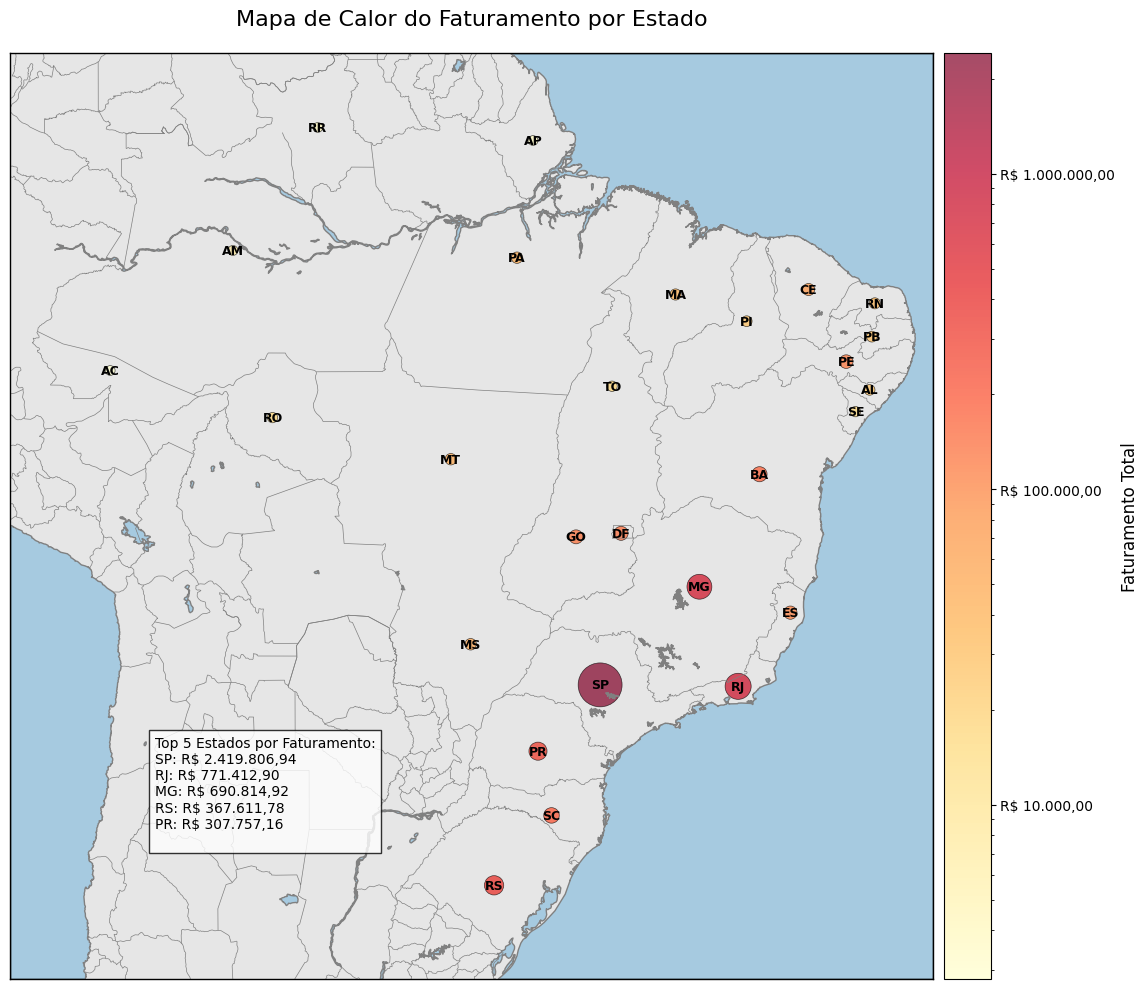


Mapa de calor do faturamento por estado gerado e salvo como 'mapa_calor_faturamento.png'


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install pandas matplotlib numpy basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors

# Adicionando identificação da loja em cada DataFrame
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os DataFrames em um só
lojas_combinadas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calculando o faturamento por loja e por estado
faturamento_por_estado = lojas_combinadas.groupby('Local da compra')['Preço'].sum().reset_index()
faturamento_por_estado = faturamento_por_estado.rename(columns={'Local da compra': 'Estado', 'Preço': 'Faturamento'})

# Ordenando por faturamento
faturamento_por_estado = faturamento_por_estado.sort_values(by='Faturamento', ascending=False)

# Verificando se temos coordenadas geográficas
if 'lat' not in lojas_combinadas.columns or 'lon' not in lojas_combinadas.columns:
    print("Aviso: Colunas 'lat' e 'lon' não encontradas. Usando coordenadas aproximadas para os estados brasileiros.")

    # Criando um dicionário com coordenadas aproximadas para os estados brasileiros
    coordenadas_estados = {
        'BA': (-12.9718, -38.5011),
        'MG': (-18.5122, -44.555),
        'PR': (-24.89, -51.55),
        'RJ': (-22.9068, -43.1729),
        'RS': (-30.0346, -51.2177),
        'SC': (-27.5954, -48.5665),
        'SP': (-23.5505, -46.6333)
    }

    # Adicionando coordenadas ao DataFrame
    faturamento_por_estado['lat'] = faturamento_por_estado['Estado'].map(lambda x: coordenadas_estados.get(x, (0, 0))[0])
    faturamento_por_estado['lon'] = faturamento_por_estado['Estado'].map(lambda x: coordenadas_estados.get(x, (0, 0))[1])
else:
    # Se as coordenadas já existirem, calcular médias para cada estado
    coordenadas = lojas_combinadas.groupby('Local da compra')[['lat', 'lon']].mean().reset_index()
    coordenadas = coordenadas.rename(columns={'Local da compra': 'Estado'})

    # Merge com o DataFrame de faturamento
    faturamento_por_estado = pd.merge(faturamento_por_estado, coordenadas, on='Estado')

# Criando o mapa
plt.figure(figsize=(12, 10))
m = Basemap(llcrnrlon=-75, llcrnrlat=-33.7, urcrnrlon=-34, urcrnrlat=5.3,
            projection='merc', resolution='i')

# Adicionando características do mapa
m.drawmapboundary(fill_color='#A6CAE0')
m.fillcontinents(color='#e6e6e6', lake_color='#A6CAE0')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# Convertendo coordenadas geográficas para coordenadas no mapa
x, y = m(faturamento_por_estado['lon'].values, faturamento_por_estado['lat'].values)

# Normalizando o tamanho dos pontos baseado no faturamento
# Tamanho mínimo de 50, máximo de 1000
faturamento_min = faturamento_por_estado['Faturamento'].min()
faturamento_max = faturamento_por_estado['Faturamento'].max()
tamanhos = ((faturamento_por_estado['Faturamento'] - faturamento_min) / (faturamento_max - faturamento_min)) * 950 + 50

# Criando uma escala de cores baseada no faturamento
# Usando uma escala logarítmica para destacar melhor as diferenças
norm = colors.LogNorm(vmin=faturamento_por_estado['Faturamento'].min(),
                     vmax=faturamento_por_estado['Faturamento'].max())

# Criando o mapa de calor com círculos
scatter = m.scatter(x, y, latlon=False, c=faturamento_por_estado['Faturamento'],
                   s=tamanhos, cmap='YlOrRd', alpha=0.7,
                   edgecolors='black', linewidth=0.5, norm=norm)

# Adicionando rótulos dos estados
for i, estado in enumerate(faturamento_por_estado['Estado']):
    plt.text(x[i], y[i], estado, fontsize=9, ha='center', va='center', weight='bold')

# Adicionando uma barra de cores
cbar = plt.colorbar(scatter, pad=0.01, format=lambda x, p: f"R$ {x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
cbar.set_label('Faturamento Total', fontsize=12)

# Adicionando título
plt.title('Mapa de Calor do Faturamento por Estado', fontsize=16, pad=20)

# Adicionando informações sobre os dados
top5_estados = faturamento_por_estado.head(5)
info_texto = "Top 5 Estados por Faturamento:\n"
for i, row in top5_estados.iterrows():
    valor_formatado = f"R$ {row['Faturamento']:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')
    info_texto += f"{row['Estado']}: {valor_formatado}\n"

plt.figtext(0.15, 0.15, info_texto, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Exibindo o mapa
plt.tight_layout()
plt.savefig('mapa_calor_faturamento.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nMapa de calor do faturamento por estado gerado e salvo como 'mapa_calor_faturamento.png'")

R E L A T Ó R I O

A presente análise tem por objetivo identificar qual loja deveria ter suas atividades encerradas. Para embasar nossa decisão, efetuamos uma análise minuciosa das informações disponibilizadas referente ao período de 2020 a 2023, incluindo aspectos relativos à faturamento, inclusive por categoria de produtos, avaliações de clientes, entre outros indicadores operacionais.

O relatório apresenta, os pontos observados no decorrer da análise e ainda, sugestões que, se adotadas, podem melhorar a performance das lojas que permanecerem em operação, permitindo uma otimização dos lucros e maior eficiência nas operações.

Pontos observados:
1- O faturamento geral das lojas apresentou declínio expressivo em 2023, representando uma redução de 76,88% em comparação a média dos 3 (três) anos anteriores;

2- A Loja 1, apesar de liderar em faturamento bruto acumulado, também sofreu queda significativa no último ano, com um faturamento bruto representando somente 29,5% da média dos últimos 3 (três) anos. Em situação pior ficaram as Lojas 3 e 4, cujo faturamento em 2023 representou apenas 18% da média dos últimos 3 (três) anos;

3- Geograficamente, a maior parte do faturamento está concentrada nos estados de São Paulo, Rio de Janeiro e Minas Gerais, com representatividade de 92,5% do faturamento total acumulado nos anos analisados (2020 a 2023), seguidos de Rio Grande do Sul e Paraná. Os outros estados da federação apresentaram faturamento consideravelmente menores, indicando operações de pouca relevância;

4- Em relação às categorias de produtos, eletrônicos, eletrodomésticos e móveis lideram em lucratividade, enquanto livros e utilidades domésticas apresentam baixo desempenho, justificando uma revisão de portfólio;

5- Outro aspecto relevante identificado foi verificar que itens como TV Led 4K, geladeiras e celulares estão entre os maiores responsáveis pelo faturamento, com destaque para os Televisores, líder de vendas. Em contraste, produtos como corda de pular, dinossauro Rex e cubo mágico, figuram com pior desempenho entre os 10 (dez) produtos menos vendidos;

6- A avaliação dos clientes mostra que a Loja 2 e 3 tem os melhores desempenhos, com nota média de 4,04 e 4,05 respectivamente, contribuindo para maior confiança e experiência positiva do cliente. Por outro lado, a Loja 1 apresenta a pior menor média (3,98), evidenciando a necessidade de melhorias no atendimento e serviços;

7- Relativamente aos produtos melhores avaliados, foi observado que somente móveis (Loja 2) está entre as categorias de maior faturamento e melhor avaliação, assegurando uma média de 4,09, enquanto brinquedos, apesar de pouco contribuir para o faturamento, recebeu as melhores avaliações (Lojas 1 e 3) e esporte e lazer (Loja 4). Diferentemente, as piores avaliações recairam sobre itens como utilidades domésticas (Loja 1), livros (Loja 2), esporte e lazer (Loja 3) e instrumentos musicais (Loja 4).

8- O frete teve custo médio igual para as 4 (quatro) lojas analisadas, com média de 5,33%, indicando que um menor valor para o frete está relacionado ao menor faturamento total em cada uma das lojas.

Conclusão e Recomendações
Com base nos dados analisados, nossa recomendação é que seja encerrada as atividades da Loja 4 por apresentar menor faturamento total, quedas acentuadas no desempenho de vendas e relevância relativa em categorias de maior importância, haja visto que as demais lojas atendem estas mesmas categorias e suprem os estados federativos de maior relevância, permitindo que esforços e recursos sejam concentrados nas demais lojas.

Entretanto, ajustes estratégicos visando melhorar o desempenho das Lojas 1, 2 e 3 devem ser empreendidos. A Loja 1, embora tenha liderado em faturamento acumulado, sofre com a pior média de avaliação de clientes, indicando a necessidade de treinamentos para a equipe e melhorias nos serviços prestados. A Loja 2, que se destaca em SP, deve intensificar sua participação nas demais localidades, como Rio de Janeiro e Minas Gerais. Já a Loja 3, melhor avaliada pelos clientes, deve maximizar seu potencial em categorias de produtos-chave, como eletro-eletrônicos.

A vista do exposto, recomendamos analisar os seguintes pontos de melhoria:
a- Portfólio de produtos - rever o mix de produtos, reduzindo ou eliminando itens de baixa aceitação como livros, utilidades domésticas entre outros, e concentrar esforços em eletrônicos, eletrodomésticos e móveis, categorias mais lucrativas.

b- Gestão regional - focar o desenvolvimento das operações em estados de maior relevância, como SP, RJ e MG, avaliando a manutenção de operações em estados de menor relevância, para otimizar os custos logísticos.

c- Experiência do cliente - Implementar treinamentos de atendimento e vendas, para que possa melhorar as avaliações dos clientes, principalmente na Loja 1, verificar as razões das avaliações negativas que determinados produtos vem recebendo e introduzir programas de fidelidade para incentivar a retenção de clientes regulares.

d- Logística e custos operacionais - revisar os custos logísticos, investir em tecnologia para melhor gerenciamento do estoque e otimização das entregas, o que permitirá alcançar maior eficiência operacional e fortalecer a sustentabilidade das lojas remanescentes.